In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [42]:
dta = pd.read_csv('../data/Food_Inspections.csv' )

In [43]:
dta.columns = dta.columns.str.lower().str.replace(' #','').str.replace(' ','_')

dta.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location'],
      dtype='object')

# Procesar fechas

In [44]:
pd.to_datetime(dta['inspection_date']).isna().value_counts()

dta['inspection_date'] = pd.to_datetime(dta['inspection_date'])

dta['inspection_month'] = dta['inspection_date'].dt.month
dta['inspection_year'] = dta['inspection_date'].dt.year

# Procesar variables categóricas

In [45]:
dta['facility_type'].unique().size
dta['facility_type'].value_counts().head(20)

top_facility_types = dta['facility_type'].value_counts().head(16).index.array


dta['inspection_type'].unique().size
dta['inspection_type'].value_counts().head(20)
top_inspection_types = dta['inspection_type'].value_counts().head(16).index.array


dta['violations'].unique().size
dta['violations'].value_counts().head(16)
#Nada bueno sale de aquí 

32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED - Comments: VIOLATION STILL PENDING                                                                                                                                                                                                                                                                                                                                                                                                                                                             11
30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABELED: CUSTOMER ADVISORY POSTED AS NEEDED - Comments: OBSERVED NO DBA NAME ON THE LATERAL SIDE OF THE CART, INSTRUCTED TO PROVIDE BUSINESS NAME LEGIBLY PAINTED IN LETTERS AT LEAST TWO INCHES IN HEIGHT IN A CONSPICUOUS PLACE ON EACH LATERAL SIDE OF CART.                                                                                                                                        

# Procesar results

In [46]:
dta.results.unique()
results_order = dta.results.value_counts().index
dta['results_group'] = np.where(dta['results'].isin(['Pass','Pass w/ Conditions']) , 'Pass', 'Not pass' ) 

# Gráficas

## Serie de tiempo de inspecciones

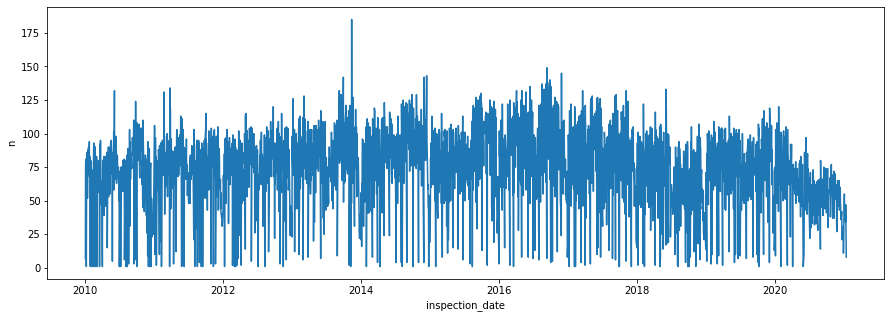

In [47]:
inspecciones_diarias = dta.groupby(['inspection_date']).size().reset_index(name = "n")

f = plt.subplots(figsize = (15,5))
ax = sns.lineplot(data = inspecciones_diarias, x = 'inspection_date', y = 'n')

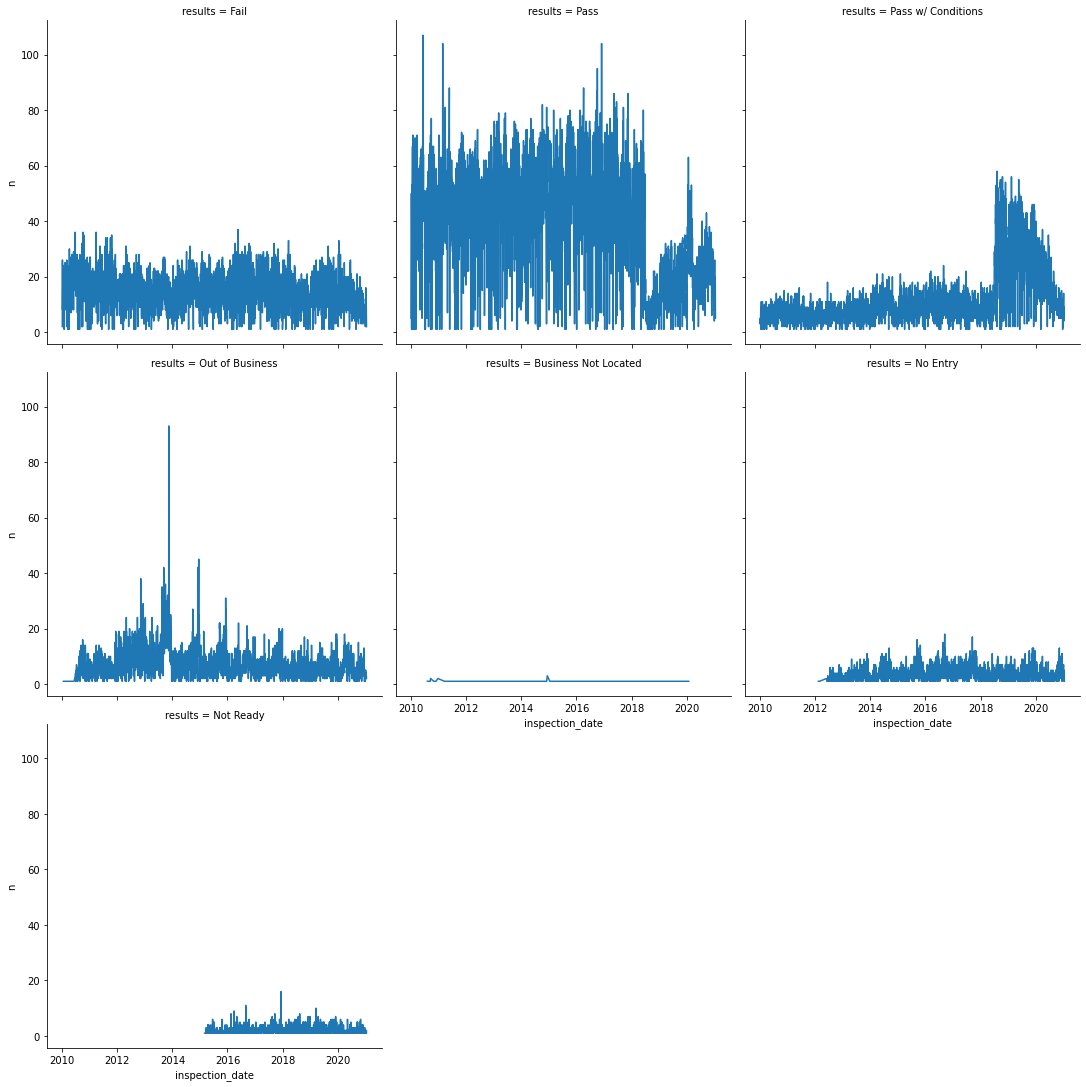

In [48]:
inspecciones_diarias_results = dta.groupby(['inspection_date', 'results']).size().reset_index(name = "n")

ax = sns.relplot(data = inspecciones_diarias_results, x = 'inspection_date',
                 y = 'n', col = 'results', col_wrap=3, kind = 'line')

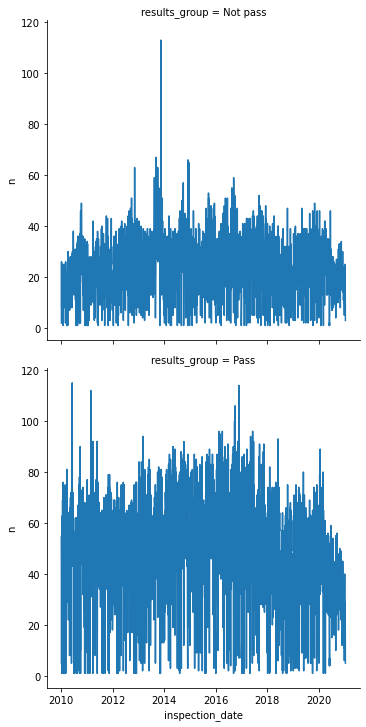

In [49]:
inspecciones_diarias_results_group = dta.groupby(['inspection_date', 'results_group']).size().reset_index(name = "n")

ax = sns.relplot(data = inspecciones_diarias_results_group, x = 'inspection_date',
                 y = 'n', col = 'results_group', col_wrap=1, kind = 'line')

## Verificar que todos los puntos se encuentran dentro de Chicago

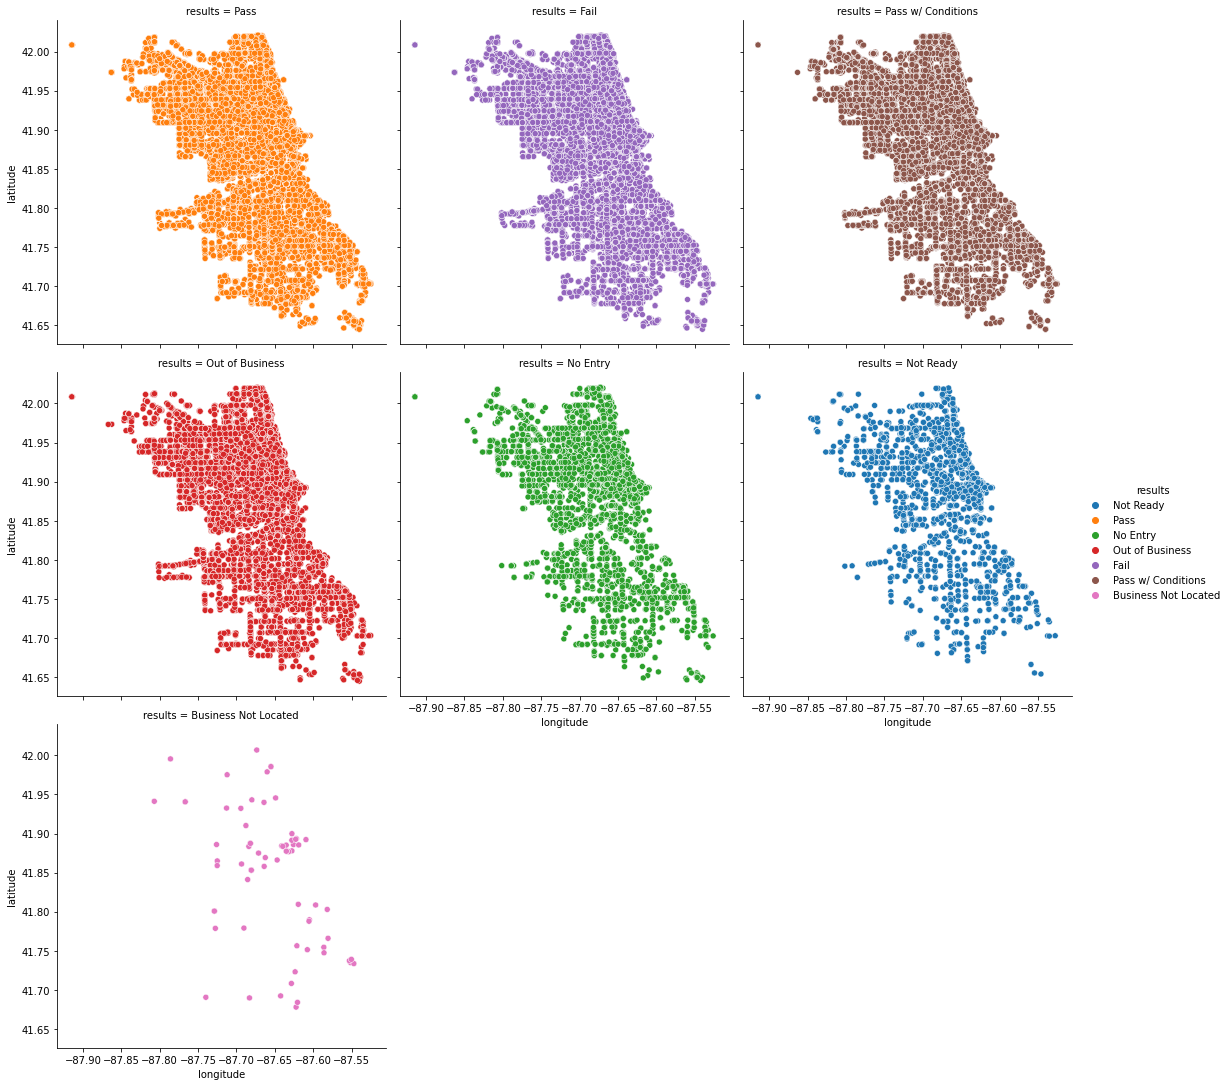

In [50]:
ax = sns.relplot(data= dta, y = "latitude", x = "longitude", hue = 'results', kind= 'scatter', col = 'results', col_wrap = 3, col_order = results_order)

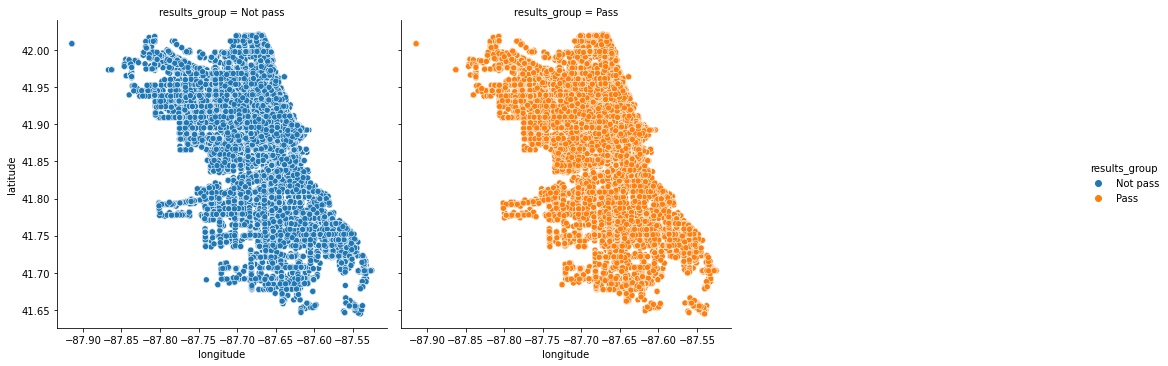

In [51]:
ax = sns.relplot(data= dta, y = "latitude", x = "longitude", hue = 'results_group', kind= 'scatter', col = 'results_group', col_wrap = 3)

## Proporciones de: 

### Risk

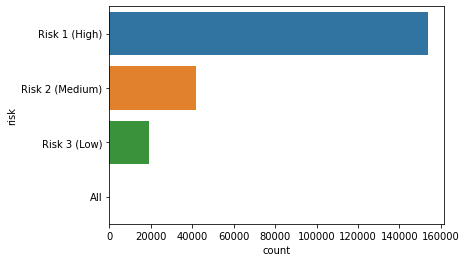

In [52]:
risk_order = dta.risk.value_counts().index
ax = sns.countplot(data = dta, y = 'risk', order = risk_order)

### Results

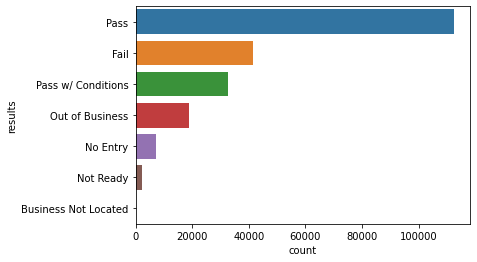

In [53]:
ax = sns.countplot(data = dta, y = 'results', order = results_order)

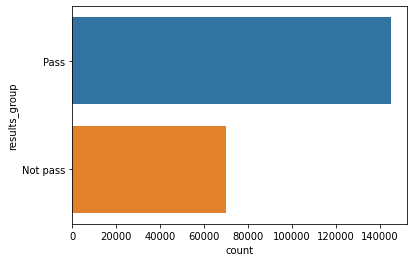

In [54]:
results_group_order = dta.results_group.value_counts().index
ax = sns.countplot(data = dta, y = 'results_group', order = results_group_order)

## Cruces de variables

### Facility Type vs. Results

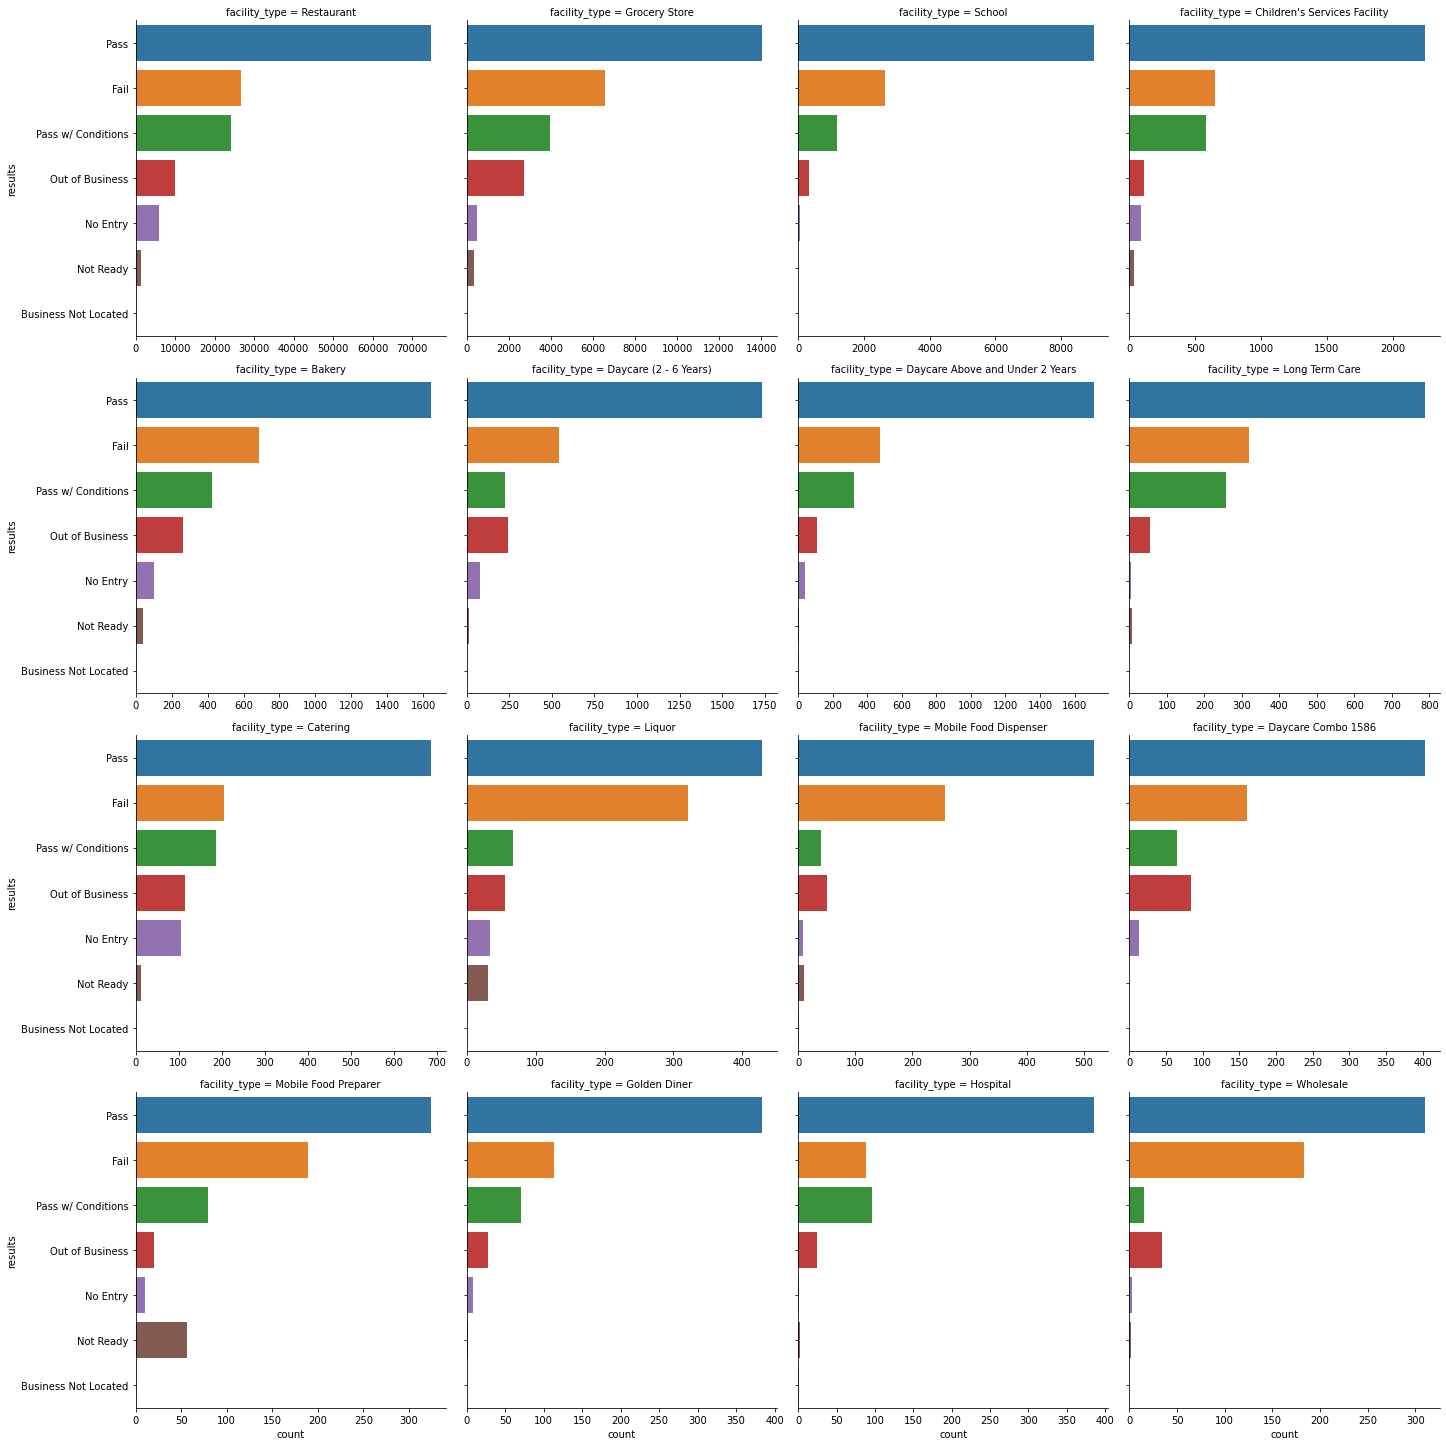

In [55]:
dta_filt_facility_type = dta[dta['facility_type'].isin(top_facility_types)]

ax = sns.catplot(data = dta_filt_facility_type, col = 'facility_type', y = 'results', kind = 'count', col_wrap=4,
                col_order = top_facility_types, order = results_order, sharex = False )  

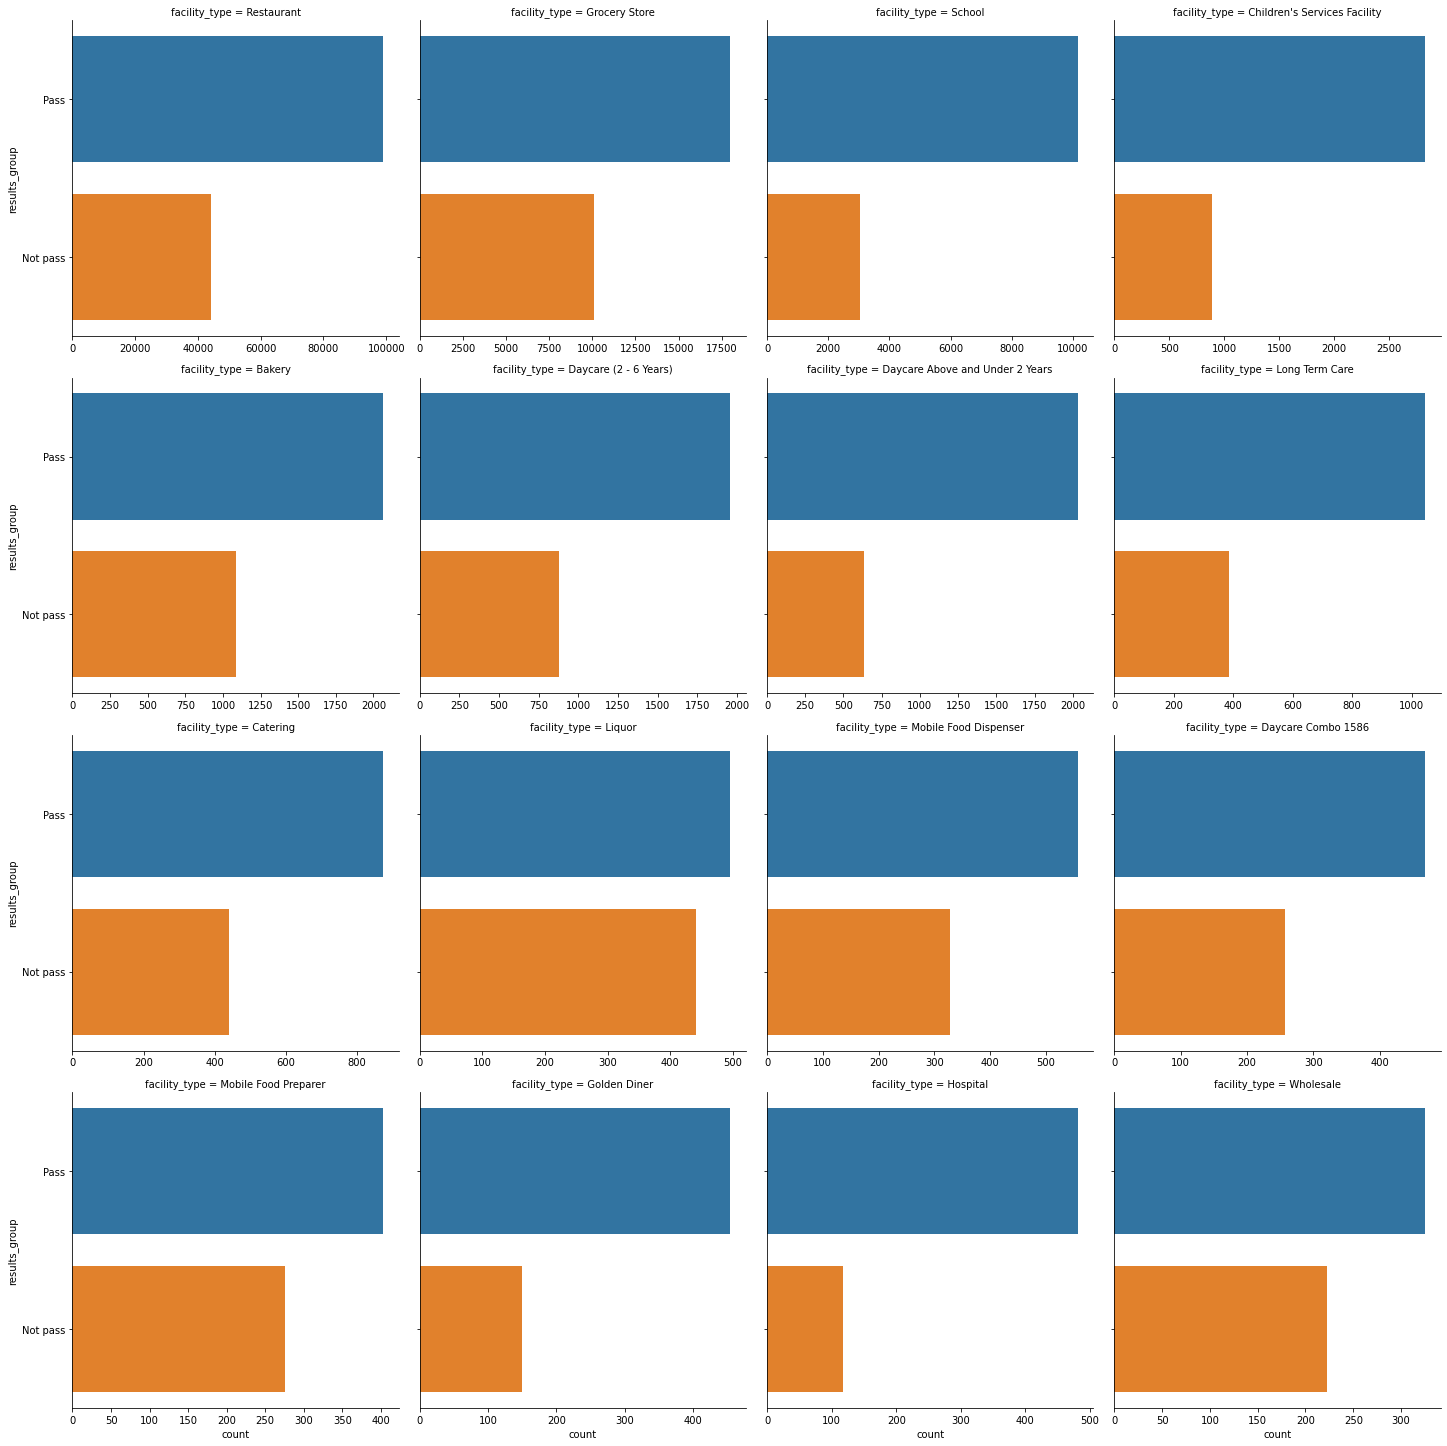

In [56]:
dta_filt_facility_type = dta[dta['facility_type'].isin(top_facility_types)]

ax = sns.catplot(data = dta_filt_facility_type, col = 'facility_type', y = 'results_group', kind = 'count', col_wrap=4,
                col_order = top_facility_types, order = results_group_order, sharex = False )  

### Inspection Type vs Results

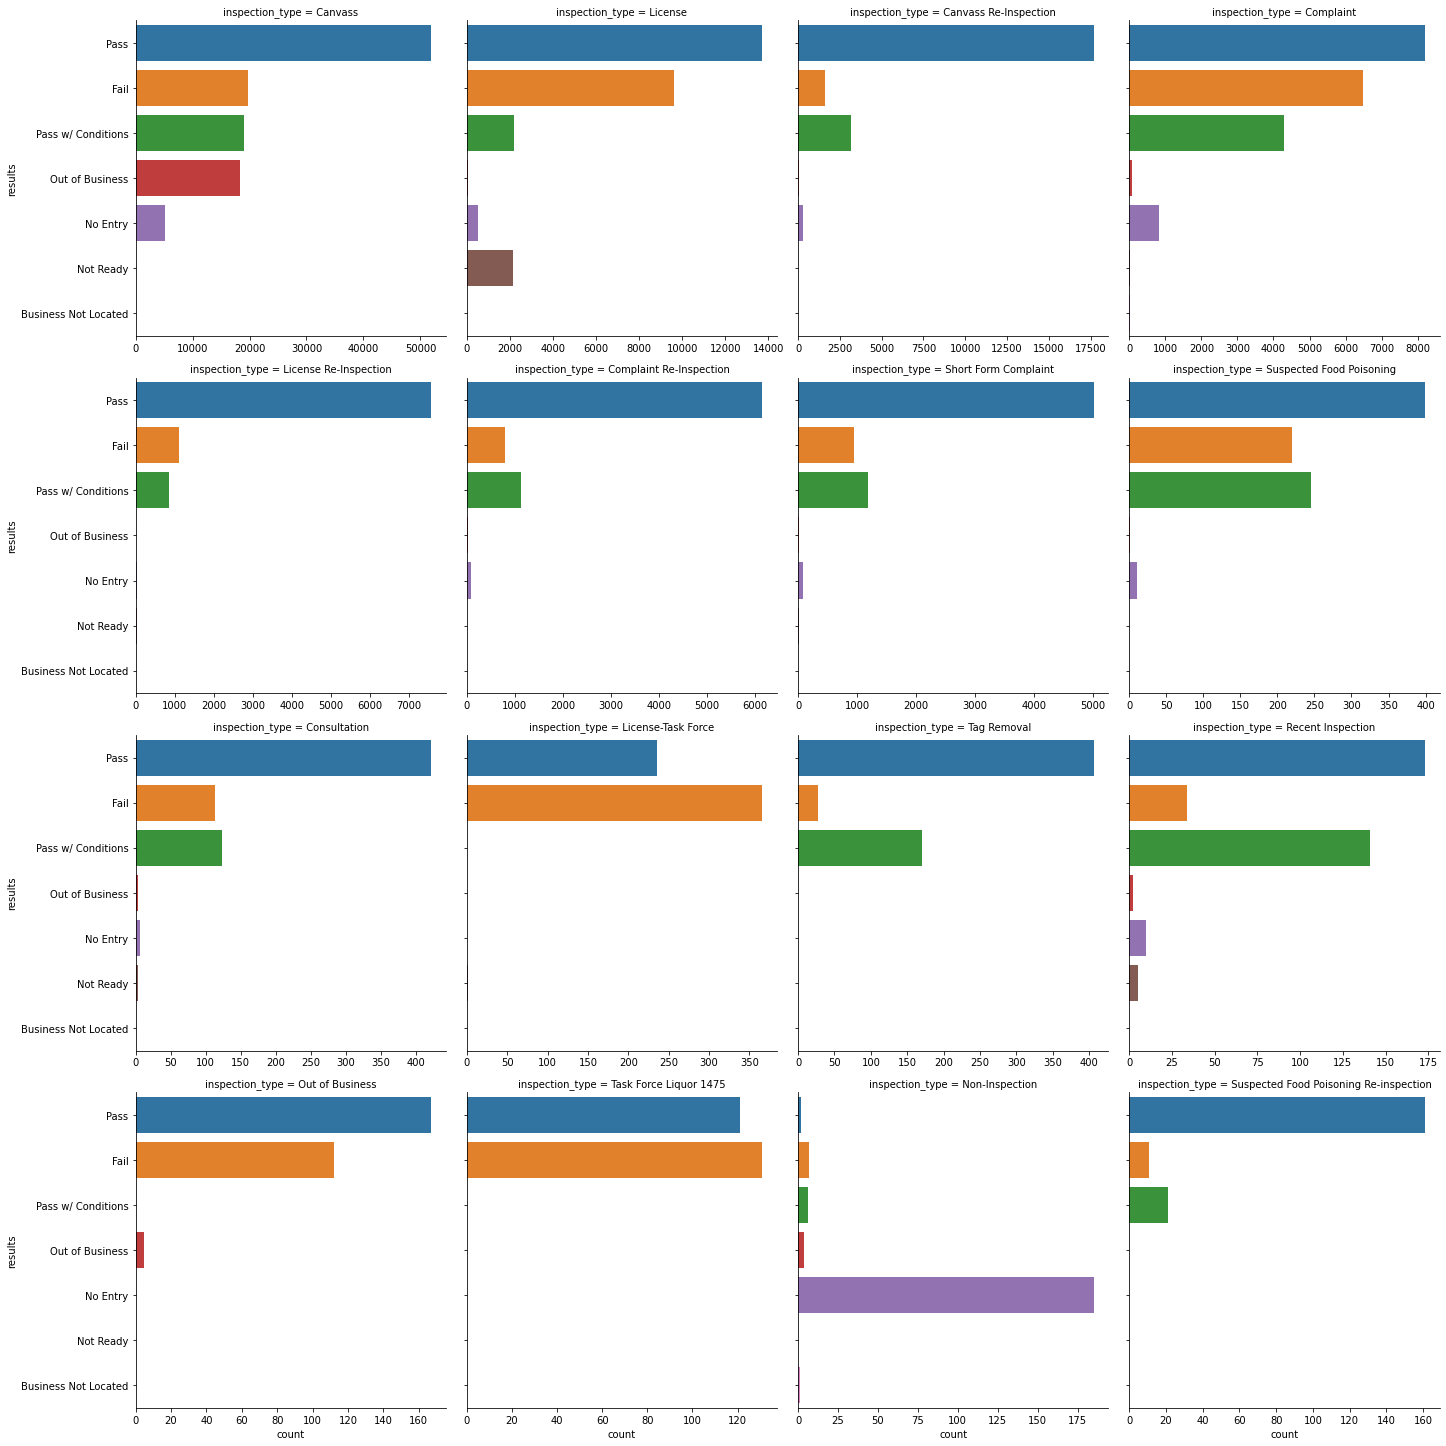

In [57]:
dta_filt_inspection_type = dta[dta['inspection_type'].isin(top_inspection_types)] 

ax = sns.catplot(data = dta_filt_inspection_type, col = 'inspection_type', y = 'results', kind = 'count', col_wrap=4,
                col_order = top_inspection_types, order = results_order, sharex = False )  

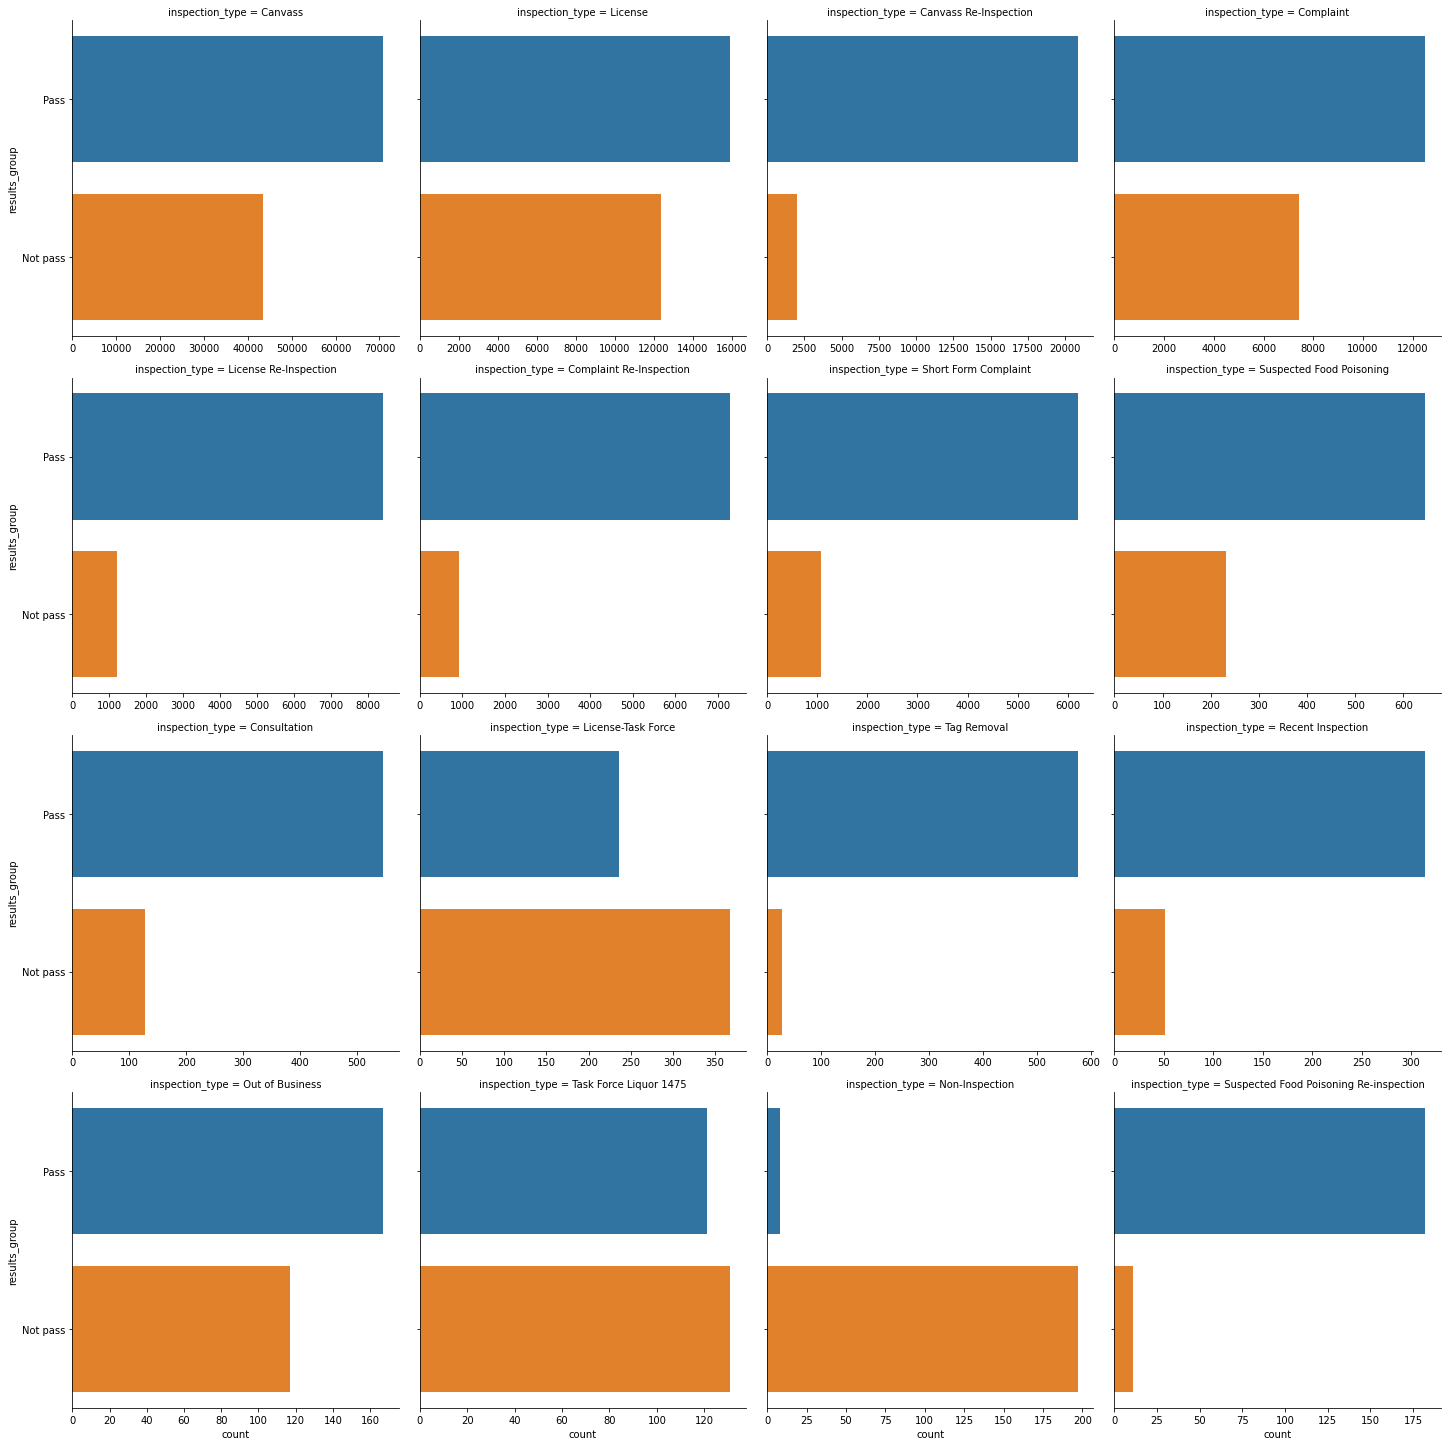

In [58]:
dta_filt_inspection_type = dta[dta['inspection_type'].isin(top_inspection_types)] 

ax = sns.catplot(data = dta_filt_inspection_type, col = 'inspection_type', y = 'results_group', kind = 'count', col_wrap=4,
                col_order = top_inspection_types, order = results_group_order, sharex = False )  

### Risk vs. Results

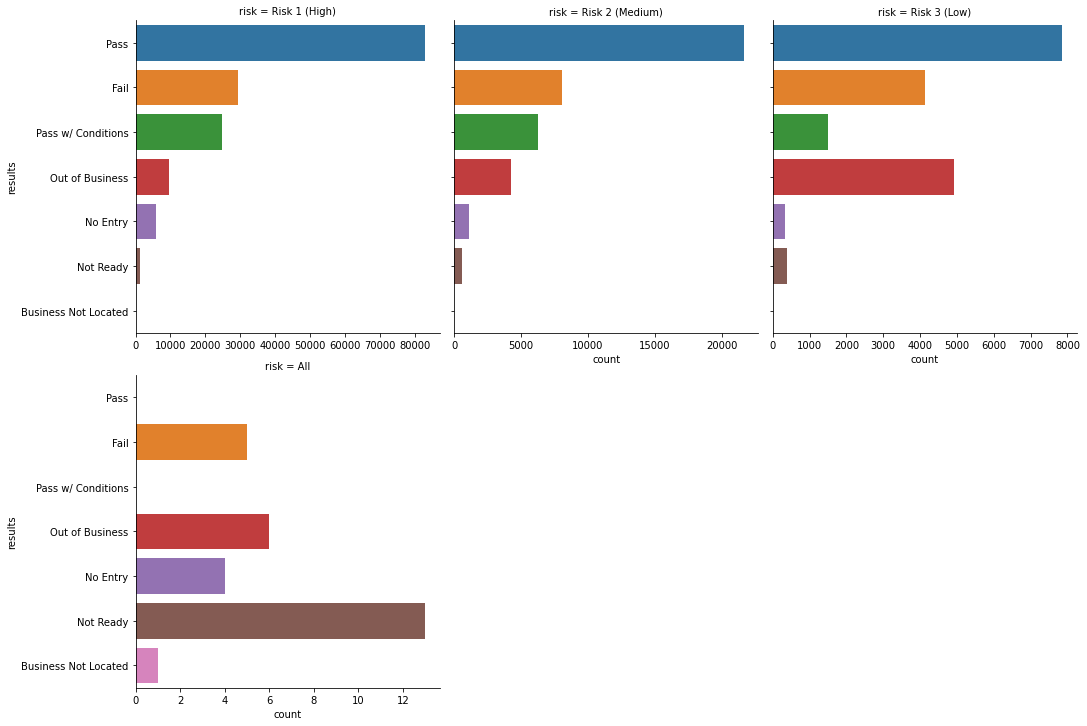

In [59]:
ax = sns.catplot(data = dta, col = 'risk', y = 'results', kind = 'count', col_wrap=3,
            order = results_order, col_order = risk_order,sharex = False)  

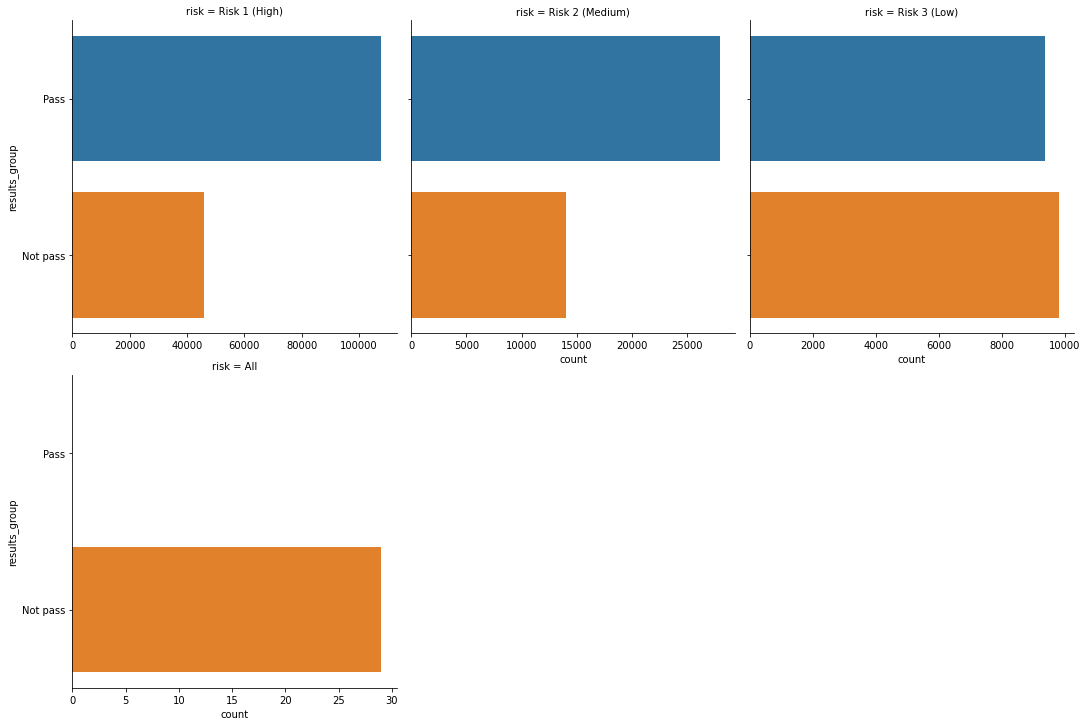

In [60]:
ax = sns.catplot(data = dta, col = 'risk', y = 'results_group', kind = 'count', col_wrap=3,
            order = results_group_order, col_order = risk_order,sharex = False)  